In [2]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import neuraltda.spikeutils as su
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
block_path = '/home/brad/krista/B1075/P01S03/'
block_path = '/home/brad/krista/B1083/P03S03/'
bdf = glob.glob('/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-fulltrial/20170626T223014Z-10.0-5.0.binned')[0]

print(bdf)
bird = 'B1083'

/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-fulltrial/20170626T223014Z-10.0-5.0.binned


In [4]:
reload(tp2)
analysis_id = 'test2'
thresh = 6.0
nperms = None
ncellsperm = 20
dim = [0,1, 2,3,4]
Ntimes = 1000

windt = 10.0
dtovr = windt*0.5
stimlen = 6000 #ms
twin = np.linspace(0, stimlen, Ntimes)

(bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                         thresh, nperms, ncellsperm,
                                         dim, twin, windt, dtovr, shuffle=False)
#shuffle
(bcs, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                            thresh, nperms, ncellsperm,
                                            dim, twin, windt, dtovr, shuffle=True)

In [103]:
pop_frs = su.get_population_firing_rate(bdf)

KeysView(<HDF5 file "20170626T223014Z-10.0-5.0.binned" (mode r)>)
Stim: I_40k, Clusters:None
Stim: J_40k, Clusters:None
Stim: K_40k, Clusters:None
Stim: L_40k, Clusters:None
Stim: M_40k, Clusters:None
Stim: N_40k, Clusters:None
Stim: O_40k, Clusters:None
Stim: P_40k, Clusters:None


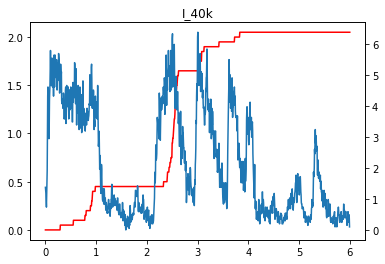

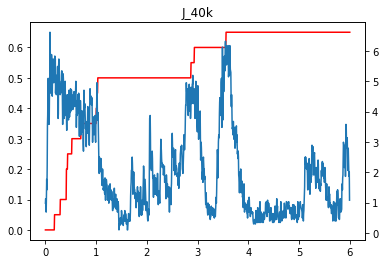

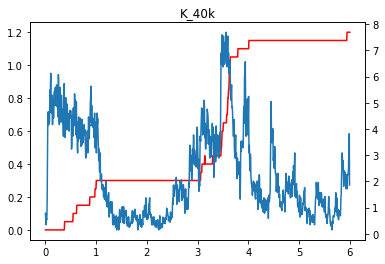

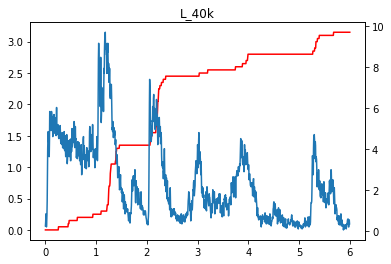

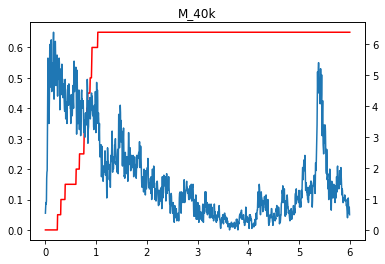

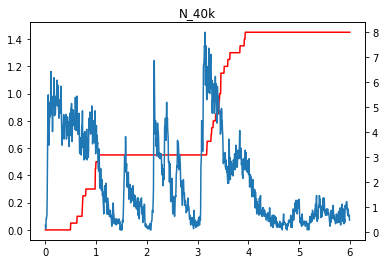

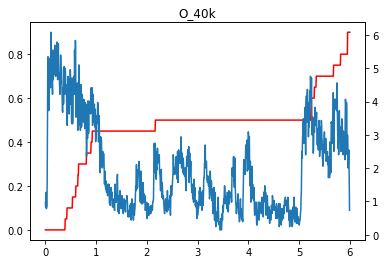

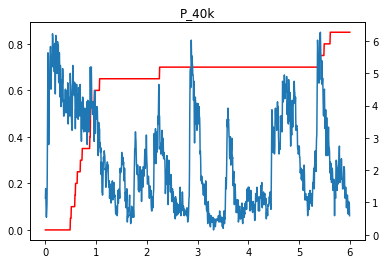

In [116]:
betti=3
for stim in bc.keys():
    fig, ax1 = plt.subplots()
    fr = np.mean(pop_frs[stim], axis=1)
    dat = bc[stim]
    avg = np.mean(dat, axis=2)
    ax1.plot(t_ms/1000, avg[betti, :], 'r')
    ax2 = ax1.twinx()
    ax2.plot(np.arange(len(fr))/(2*100), fr)
    plt.title(stim)
    #plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')

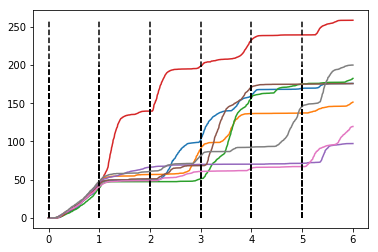

In [104]:
betti=2
for stim in bc.keys():
    dat = bc[stim]
    avg = np.mean(dat, axis=2)
    plt.plot(t_ms/1000., avg[betti, :])
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')
    ax = plt.gca()
    axs[ind].plot(t_ms/1000, y,linewidth=2)
    ax.fill_between(t_ms/1000, y-s, y+s, alpha=0.5)
    axs[ind].plot(t_ms/1000, ys, linewidth=2)
    ax.fill_between(t_ms/1000, ys-ss, ys+ss, alpha=0.5)
    ax.tick_params(labelsize=20)
    ax.set_xticks(range(7))

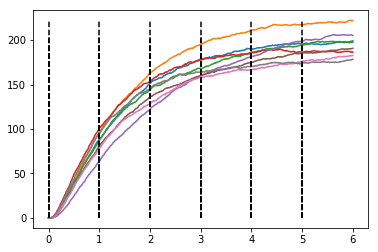

In [23]:
betti=1
for stim in bc.keys():
    dat = bcs[stim]
    avg = np.mean(dat, axis=2)
    plt.plot(t_ms/1000., avg[betti, :])
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')

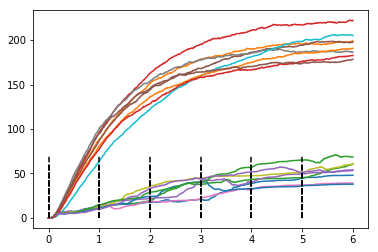

In [31]:
betti=1
for stim in bc.keys():
    dat = bc[stim]
    dats = bcs[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    plt.plot(t_ms/1000., avg[betti, :])
    plt.plot(t_ms/1000., avgs[betti, :])
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')

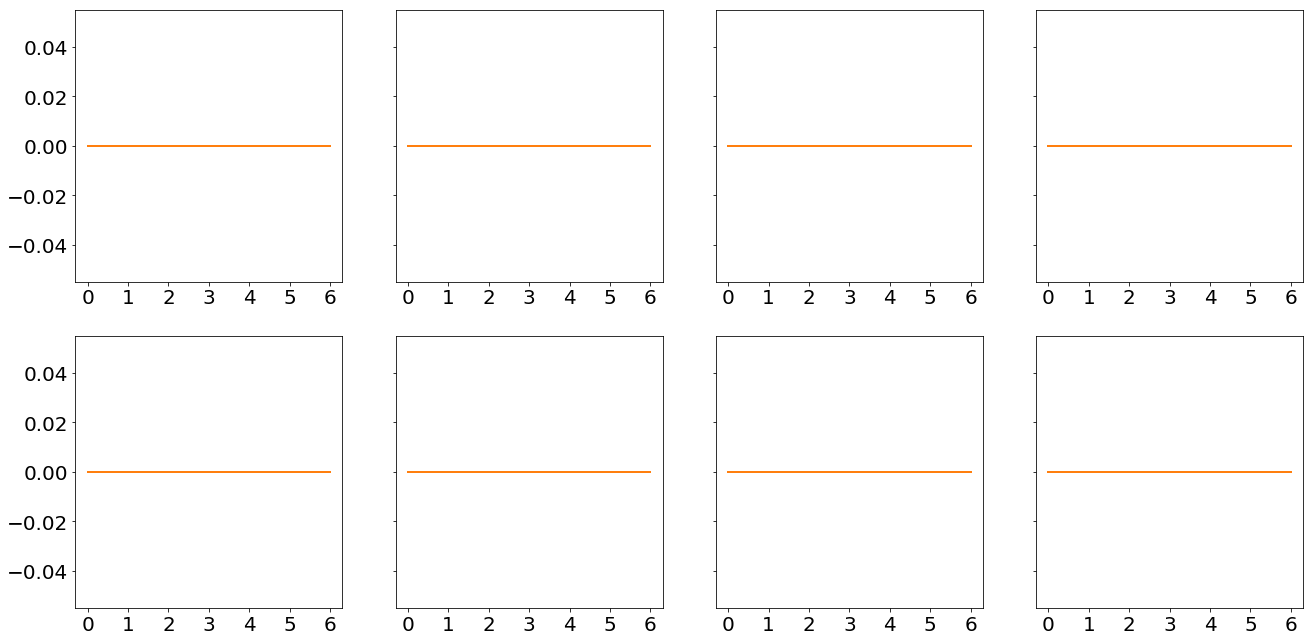

In [15]:

betti = 4
fig, axs = plt.subplots(2,4, figsize=(22,11), sharey=True)
axs = axs.flatten()
for ind, stim in enumerate(bc.keys()):
    dat = bc[stim]
    dats = bcs[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    
    std = np.std(dat, axis=2)
    stds = np.std(dats, axis=2)
    
    stderr = std / np.sqrt(np.shape(dat)[2])
    stderrs = stds / np.sqrt(np.shape(dats)[2])
    
    y = avg[betti, :]
    ys = avgs[betti, :]
    
    s = stderr[betti, :]
    ss = stderrs[betti, :]
    
    ax = axs[ind]
    axs[ind].plot(t_ms/1000, y,linewidth=2)
    ax.fill_between(t_ms/1000, y-s, y+s, alpha=0.5)
    axs[ind].plot(t_ms/1000, ys, linewidth=2)
    ax.fill_between(t_ms/1000, ys-ss, ys+ss, alpha=0.5)
    ax.tick_params(labelsize=20)
    ax.set_xticks(range(7))
    
plt.savefig(os.path.join('/home/brad/DailyLog/20170814/', '{}_P03S03_BettiCurveWithShuffled_betti{}.eps'.format(bird,betti)))

In [80]:
stderr.shape

(5, 1000)

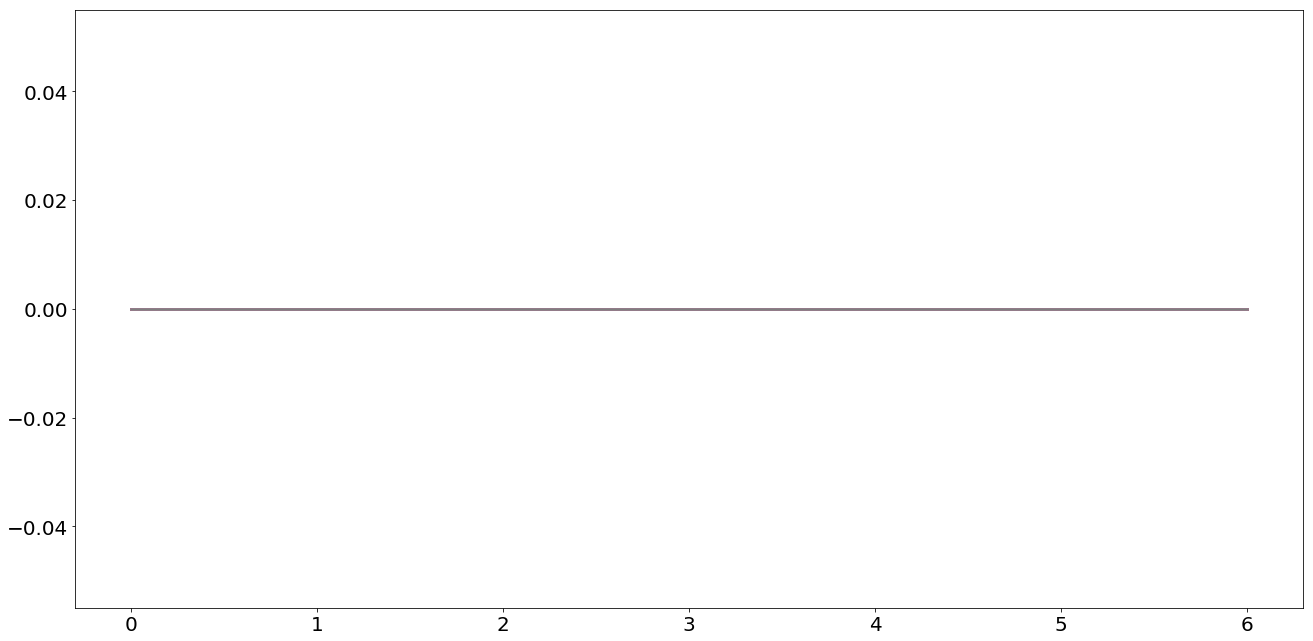

In [21]:
betti=4
plt.figure(figsize=(22, 11))
for stim in bc.keys():
    dat = bc[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    
    std = np.std(dat, axis=2)
    stds = np.std(dats, axis=2)
    
    stderr = std / np.sqrt(np.shape(dat)[2])
    stderrs = stds / np.sqrt(np.shape(dats)[2])
    
    y = avg[betti, :]
    ys = avgs[betti, :]
    
    s = stderr[betti, :]
    ss = stderrs[betti, :]
    plt.plot(t_ms/1000., y, linewidth=2.5)
    
    ax = plt.gca()
    ax.fill_between(t_ms/1000., y-s, y+s, alpha = 0.3)
    ax.tick_params(labelsize=20)
    ax.set_xticks(range(7))
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')
    
plt.savefig(os.path.join('/home/brad/DailyLog/20170814/', '{}_P03S03_BettiCurvesAllStim_betti{}.eps'.format(bird, betti)))

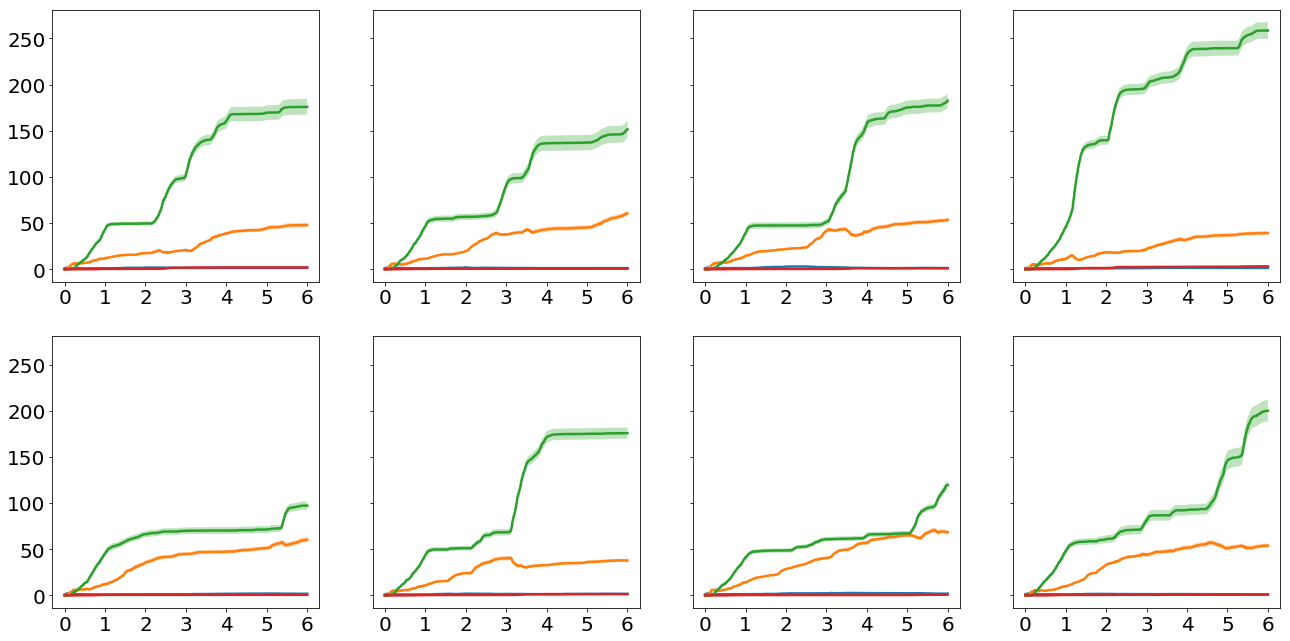

In [10]:
fig, axs = plt.subplots(2, 4, sharey=True, figsize=(22, 11))
bettis = [0,1,2,3]

axs = np.ravel(axs)
for ind, stim in enumerate(bc.keys()):
    dat = bc[stim]
    dats = bcs[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    
    std = np.std(dat, axis=2)
    stds = np.std(dats, axis=2)
    
    stderr = std / np.sqrt(np.shape(dat)[2])
    stderrs = stds / np.sqrt(np.shape(dats)[2])
    ax = axs[ind]
    for betti in bettis:
        y = avg[betti, :]
        ys = avgs[betti, :]
    
        s = stderr[betti, :]
        ss = stderrs[betti, :]
        ax.plot(t_ms/1000., y, linewidth=2.5)
        ax.fill_between(t_ms/1000., y-s, y+s, alpha = 0.3)
        ax.tick_params(labelsize=20)
        ax.set_xticks(range(7))
    #plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')